In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 5005)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [2]:
bank_df = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")

In [3]:
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
print('Does Age column contains any 0: ',(bank_df['Age']==0).any())
print('Does Experience column contains any 0:',(bank_df['Experience']==0).any())
print('Does ZIPCode column contains any 0:',(bank_df['ZIP Code']==0).any())
print('Does Family column contains any 0:',(bank_df['Family']==0).any())
print('Does Education column contains any 0:',(bank_df['Education']==0).any())

Does Age column contains any 0:  False
Does Experience column contains any 0: True
Does ZIPCode column contains any 0: False
Does Family column contains any 0: False
Does Education column contains any 0: False


In [5]:
pd.unique(bank_df.Age)

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23], dtype=int64)

In [6]:
pd.unique(bank_df.Experience)

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

In [7]:
bank_df['Experience'][bank_df['Experience']<0] = 0

In [8]:
#replacing negative values of experience with zero
pd.unique(bank_df.Experience)

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22,  0, 34, 38, 40, 33,  4, 42, 43], dtype=int64)

In [9]:
bank_df.shape

(5000, 14)

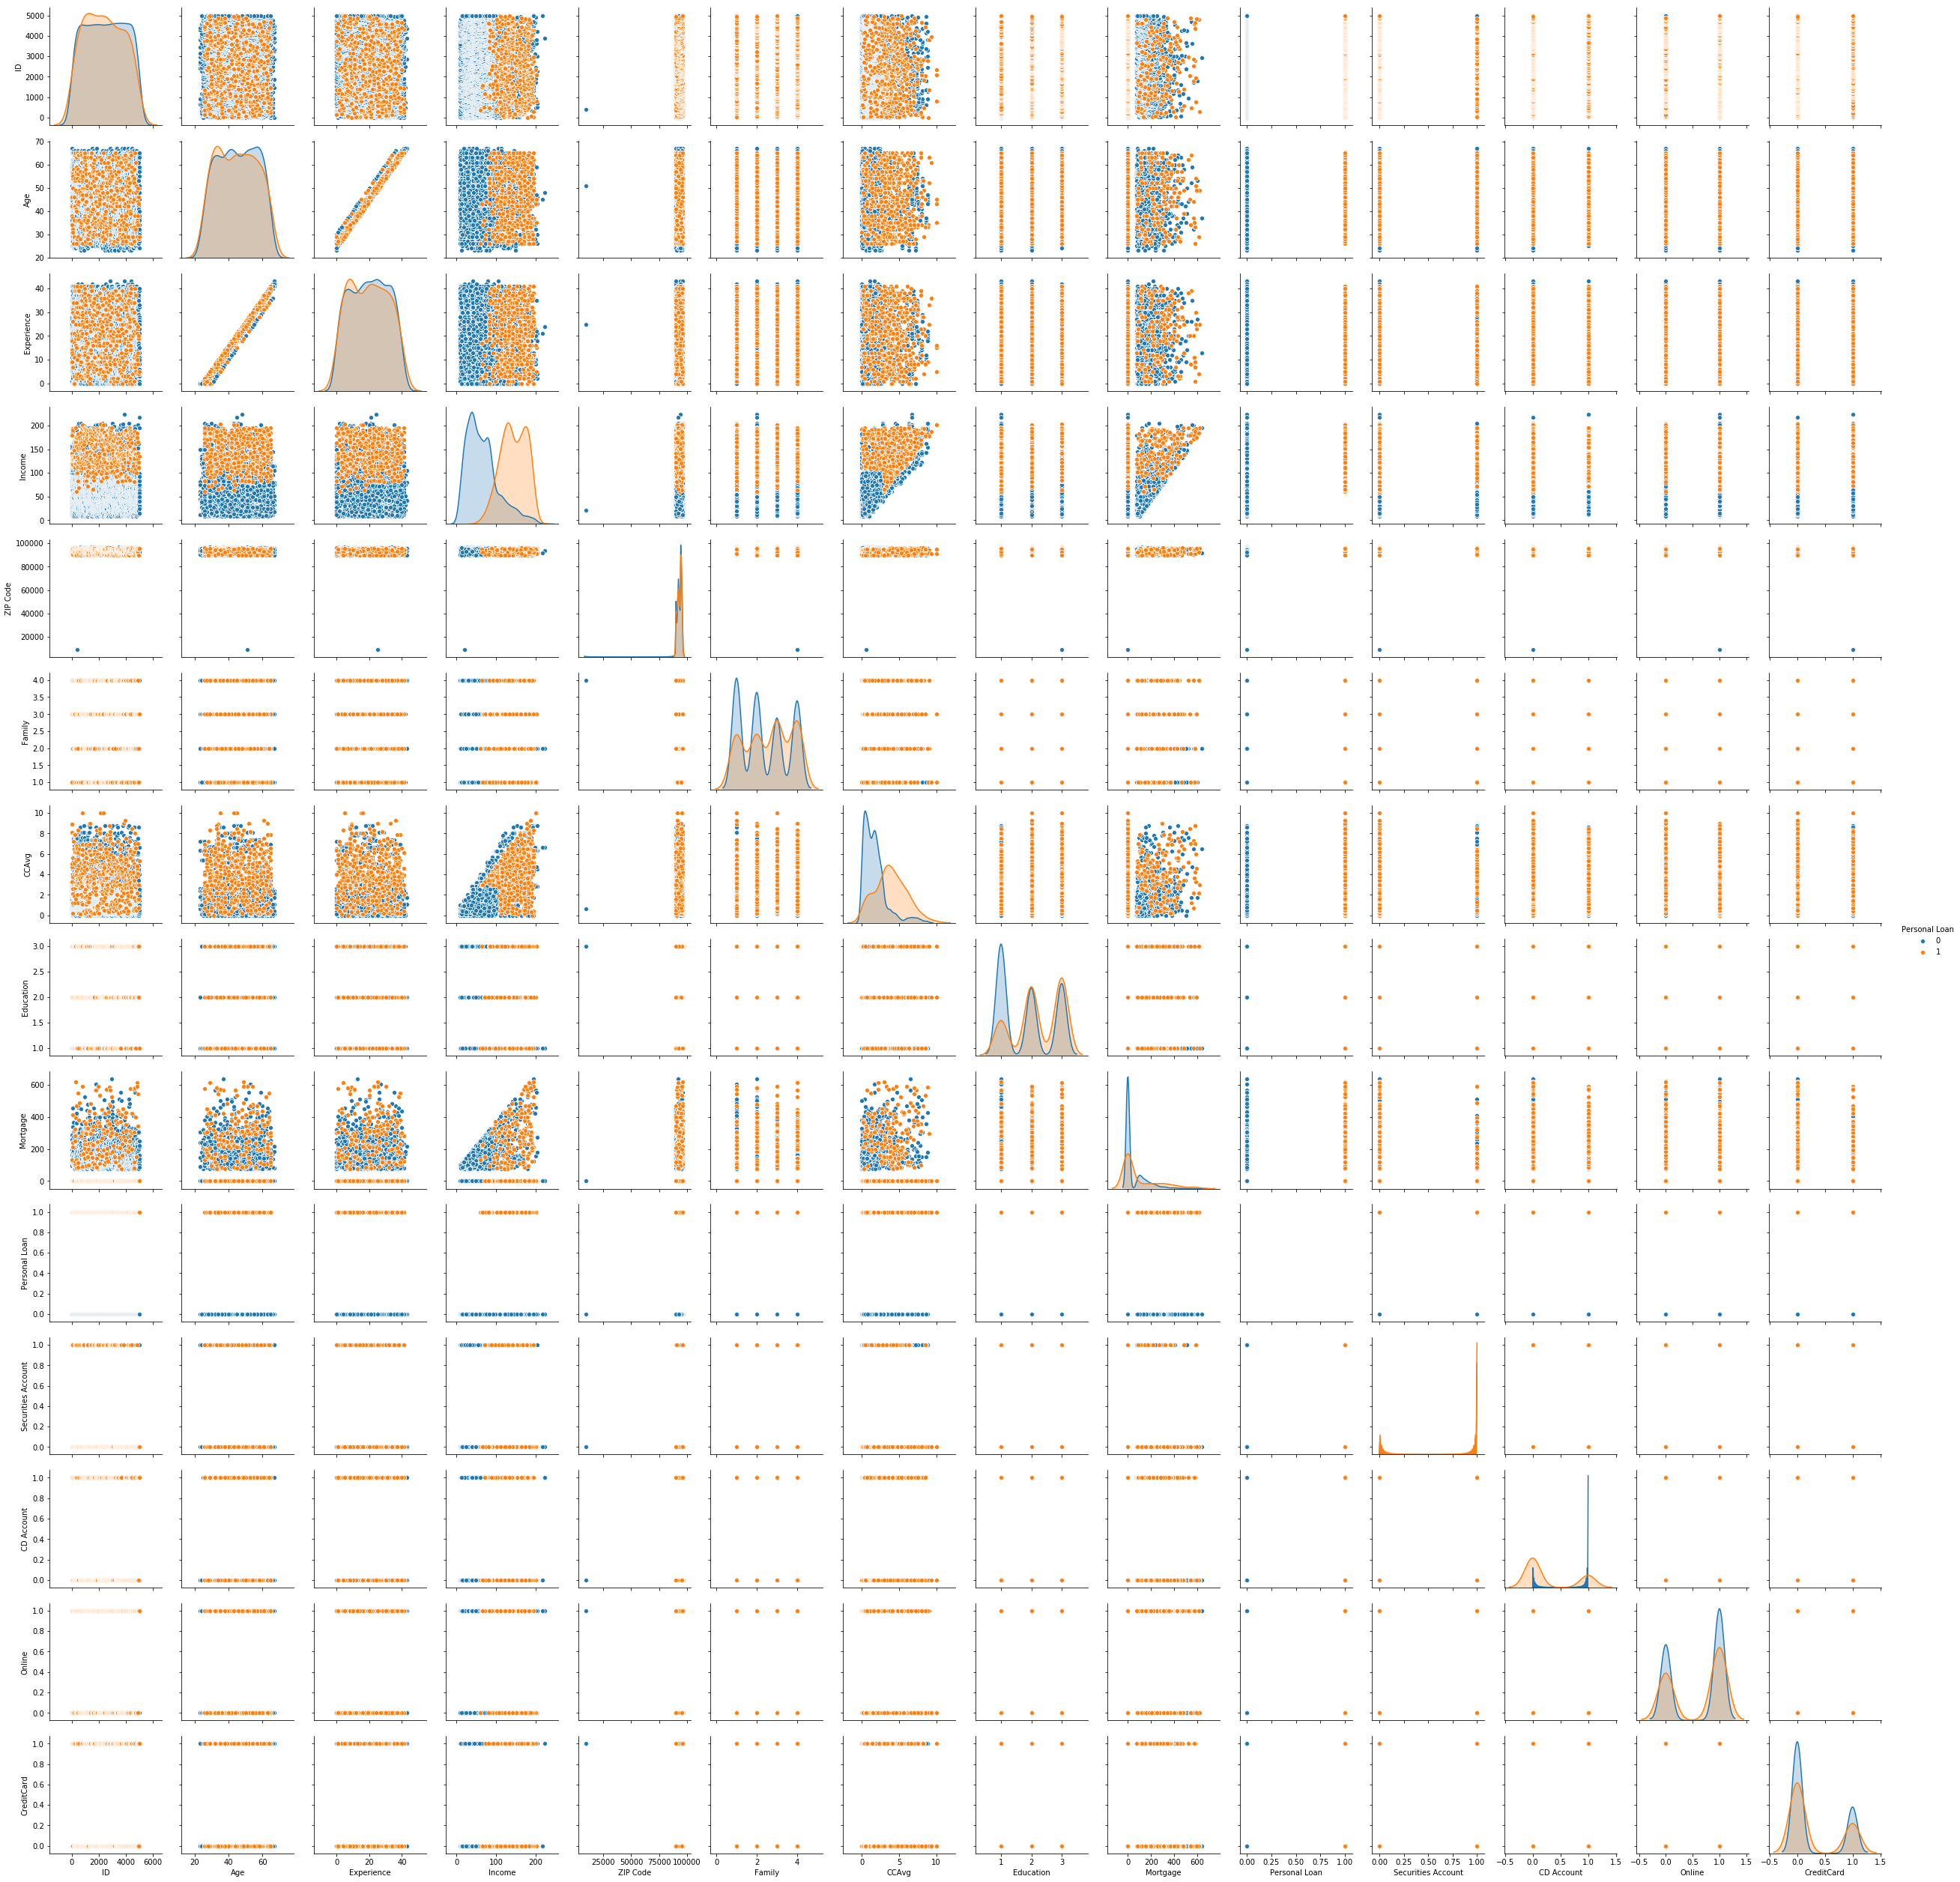

In [10]:
sns.pairplot(bank_df,hue='Personal Loan')

In [11]:
bank_df.groupby(['Personal Loan']).count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


In [12]:
print('1. normal distibution of income shows that it is rightly skewed. which means it is having outliers.')
print('2. similarly CCAvg, Mortgage histogram also rightly skewed.')
print('3. Experience and age is having linear relation. i.e experience increases with age.')
print('4. Age and income are having very poor relation.')
print('5. by looking at the income histogram, we got to know that people having less income are less tends to buy personal loan.')
print('6. Average spending on credit card per month is more for people who did not opt for personal Loan.')
print('7. ratio of granted personal loan to not granted personal loan is almost 1:10 hence ability of model to predict no personal loan is better')

1. normal distibution of income shows that it is rightly skewed. which means it is having outliers.
2. similarly CCAvg, Mortgage histogram also rightly skewed.
3. Experience and age is having linear relation. i.e experience increases with age.
4. Age and income are having very poor relation.
5. by looking at the income histogram, we got to know that people having less income are less tends to buy personal loan.
6. Average spending on credit card per month is more for people who did not opt for personal Loan.
7. ratio of granted personal loan to not granted personal loan is almost 1:10 hence ability of model to predict no personal loan is better


In [13]:
#Get the target column distribution. Your comments

In [14]:
X = bank_df.drop(['Personal Loan'],axis=1)

In [15]:
y = bank_df['Personal Loan']

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3,random_state=1)

In [42]:
#Finding accuracy based on logistic regression

In [44]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print('The testing accuracy: ',model_score)
print(metrics.confusion_matrix(y_test, y_predict))

The testing accuracy:  0.908
[[1319   32]
 [ 106   43]]


In [21]:
#Finding accuracy based on KNN model

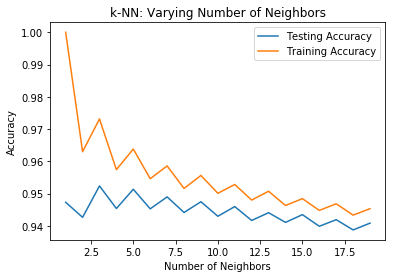

In [22]:
neighbors = np.arange(1, 20)
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    train = []
    test = []
    for j in range(20):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=j)
        mm_scaler = StandardScaler()
        scaledX_train = mm_scaler.fit_transform(X_train)
        scaledX_test = mm_scaler.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        train.append(knn.score(scaledX_train,y_train))
        test.append(knn.score(scaledX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [48]:
#best Knn model for k = 5
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.30,random_state=3)
print(X_train_knn.shape)
print(X_test_knn.shape)
print(y_train_knn.shape)
print(y_test_knn.shape)
mm_scaler = preprocessing.MinMaxScaler()
#scaledX_train_knn = mm_scaler.fit_transform(X_train_knn)
#scaledX_test_knn = mm_scaler.transform(X_test_knn)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_knn,y_train_knn)
print('train accuracy:',knn.score(X_train_knn,y_train_knn))
print('test accuracy:',knn.score(X_test_knn,y_test_knn))
y_predict_class1 = knn.predict(X_test)
print(metrics.confusion_matrix(y_test_knn, y_predict_class1))

(3500, 13)
(1500, 13)
(3500,)
(1500,)
train accuracy: 0.9128571428571428
test accuracy: 0.8966666666666666
[[1335   14]
 [ 151    0]]


In [27]:
#Finding accuracy based on Naive Bayes model

In [33]:
gnb = MultinomialNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test_scaled)
naive_bayes_testing_acc = metrics.accuracy_score(y_test, y_pred)
print("Test Accuracy:",naive_bayes_testing_acc)
print('The confusion matrix: ')
print(metrics.confusion_matrix(y_test,y_pred))

Test Accuracy: 0.8006666666666666
The confusion matrix: 
[[1188  160]
 [ 139   13]]


In [36]:
print('testing accuracy of KNN Model is: ',knn_test_accuracy)
print('testing accuracy of Logistic Model is: ',logistics_model_score)
print('testing accuracy of Naive Bayes Model is: ',naive_bayes_testing_acc)

testing accuracy of KNN Model is:  0.8966666666666666
testing accuracy of Logistic Model is:  0.8986666666666666
testing accuracy of Naive Bayes Model is:  0.8006666666666666


In [38]:
print('Hence from the above conclusion it seems that Logistics model is having the best accurarcy')

Hence from the above conclusion it seems that Logistics model is having the best accurarcy
